In [1]:
from time import sleep
from os import chdir, mkdir
from os.path import isdir, isfile

try:
    chdir(r'A:\_Projetos\AnotacoesEstudosBackPythonLSP\Home\acoes')
except:
    chdir(r'C:\Users\GOMEE11\Documents\_Referencias\Git\AnotacoesEstudosBackPythonLSP\Home\acoes')

for d in ['.\\Graph', '.\\Tables']:
    if isdir(d):
        pass
    else:
        mkdir(d)
        pass

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from make_data import Down_Data, Analisys, Graph
import datetime

%matplotlib inline

# Analise individual de Ticker

### Analise Técnica

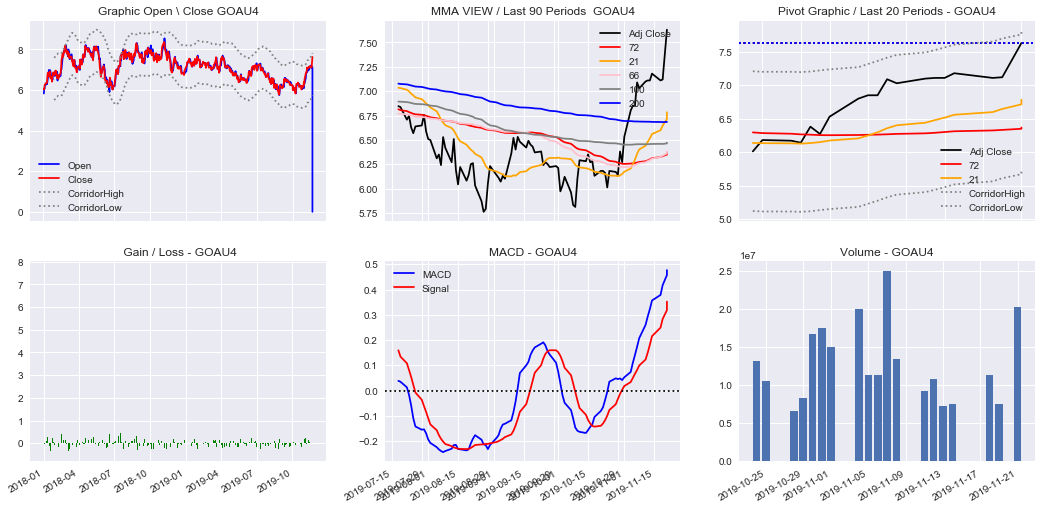

In [47]:
ticker = 'GOAU4'

target = Down_Data(ticker)
analise = Analisys(target, ticker)
graph = Graph(target, ticker)

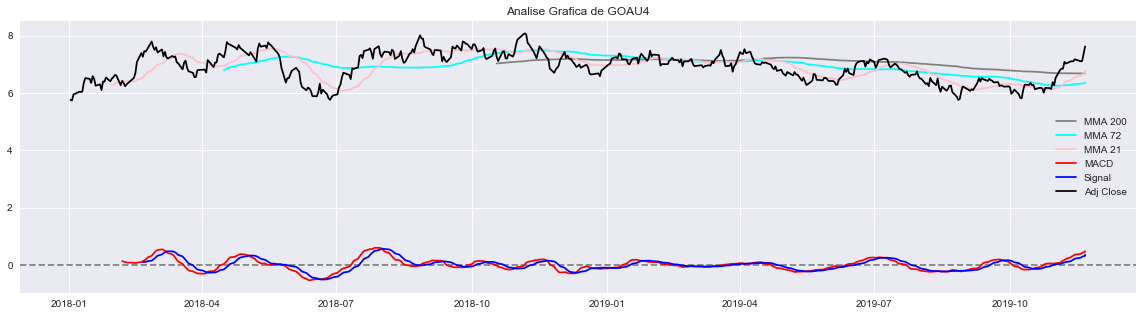

In [48]:
plt.figure(figsize=(20, 5))

plt.plot(analise['MMA200'], color='Grey', label='MMA 200')
plt.plot(analise['MMA72'], color='Cyan', label='MMA 72')
plt.plot(analise['MMA21'], color='Pink', label='MMA 21')

plt.axhline(0, color='Grey', linestyle="--")

plt.plot(analise['MACD'], color='Red', label='MACD')
plt.plot(analise['Signal'], color='Blue', label='Signal')

plt.plot(analise['Adj Close'], color='Black', label='Adj Close')


plt.title(f'Analise Grafica de {ticker}')

plt.legend()

plt.show()

## Euler Discratization

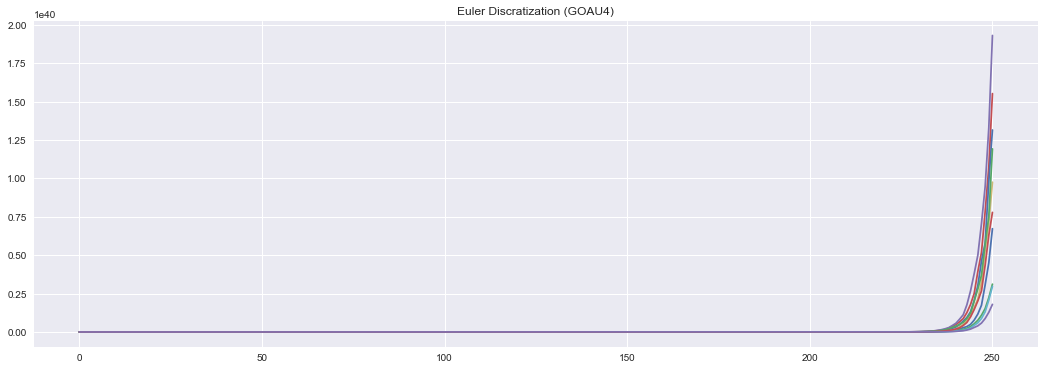

In [49]:
log_returns = np.log(1 + analise['Adj Close'].pct_change())
r = 0.025
stdev = log_returns.std() * 250 ** 0.5
#stdev = stdev.values
T = 1.0
t_intervals = 250
delta_t = T / t_intervals
iterations = 10000
z = np.random.standard_normal((t_intervals + 1, iterations))
s = np.zeros_like(z)
S0 = analise['Adj Close'].iloc[-1]
s[0] = S0

for t in range(1, t_intervals + 1):
    s[t] = s[t - 1] * np.exp((r - 0.5 * stdev **2) * delta_t + stdev + delta_t ** 0.5 * z[t])
    pass

plt.figure(figsize=(18,6))
plt.title(f'Euler Discratization ({ticker})')
plt.plot(s[: , :10])
plt.show()

In [50]:
analise.tail(9)


,High,Low,Open,Close,Volume,Adj Close,MMA200,MMA100,MMA72,MMA66,MMA21,PriceX2,CorridorHigh,CorridorLow,GainLoss,MACD,Signal
Date,,,,,,,,,,,,,,,,,
2019-11-08,7.19,6.96,7.01,7.05,13429100.0,7.030197,6.688651,6.456456,6.274281,6.262177,6.402916,14.060393,7.453598,5.367402,0.04,0.207492,0.099343
2019-11-11,7.13,6.89,6.96,7.12,9194800.0,7.100000,6.687291,6.456413,6.282478,6.272470,6.441379,14.200000,7.491098,5.404902,0.16,0.260484,0.123221
2019-11-12,7.15,6.98,7.15,7.11,10777500.0,7.110000,6.687203,6.456272,6.290952,6.285167,6.480793,14.220000,7.526098,5.439902,-0.04,0.293661,0.150460
2019-11-13,7.17,7.04,7.04,7.11,7205500.0,7.110000,6.686773,6.458112,6.302040,6.294261,6.516883,14.220000,7.565348,5.479152,0.07,0.322683,0.181661
2019-11-14,7.20,7.02,7.11,7.18,7521200.0,7.180000,6.685275,6.459067,6.313550,6.309219,6.560106,14.360000,7.606348,5.520152,0.07,0.356572,0.215421
2019-11-18,7.29,7.05,7.22,7.11,11288300.0,7.110000,6.684405,6.459817,6.325601,6.325369,6.599520,14.220000,7.652098,5.565902,-0.11,0.378499,0.249287
2019-11-19,7.22,7.03,7.10,7.12,7499900.0,7.120000,6.683291,6.459281,6.333801,6.338967,6.646533,14.240000,7.698598,5.612402,0.02,0.417303,0.283459
2019-11-21,7.64,7.12,7.12,7.63,20224400.0,7.630000,6.684777,6.464735,6.350598,6.362409,6.715457,15.260000,7.758848,5.672652,0.51,0.457001,0.318583
2019-11-21,7.63,7.63,0.00,7.63,0.0,7.630000,6.686311,6.472172,6.369458,6.384944,6.784382,15.260000,7.829598,5.743402,7.63,0.476948,0.352294


### Analise Fundamentalista
http://www.fundamentus.com.br/detalhes.php?papel=

In [51]:
dia = f'{datetime.datetime.now().year}-{datetime.datetime.now().month}-{datetime.datetime.now().day}'

Preco = analise['Adj Close'][-1]

vals_1 = ['1.087.240.000', '10.143.400.000', '0,47', '9,33']
vals_2 = []

for v in vals_1:
    x = v.replace('.', '_')
    x = x.replace(',', '.')
    vals_2.append(float(x))

NroAcoes = vals_2[0]
VPatriLiq = vals_2[1]
V_VP = Preco / (VPatriLiq / NroAcoes)
LPA, VPA = vals_2[2] , vals_2[3]

VIntrinseco = (22.5 * LPA * VPA) ** 0.5
JustoSimNao = (VIntrinseco - Preco) - 1

FundReport = pd.DataFrame(
    [
        [
        ticker,
        Preco,
        NroAcoes,
        VPatriLiq,
        round(V_VP, 5),
        LPA,
        VPA,
        VIntrinseco,
        JustoSimNao
        ]

        ],
    columns=[
        'Ticker',
        'Preco',
        'Numero Acoes',
        'Valor Patrimonial',
        'V/VP',
        'LPA',
        'VPA',
        'Valor Intrinseco',
        'Justo'
        ],
    index=[dia]
    )


FundReport

,Ticker,Preco,Numero Acoes,Valor Patrimonial,V/VP,LPA,VPA,Valor Intrinseco,Justo
2019-11-22,GOAU4,7.63,1.087240e+09,1.014340e+10,0.81784,0.47,9.33,9.933013,1.303013


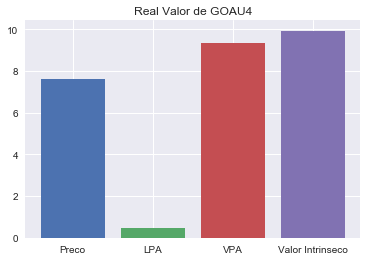

In [52]:
plt.bar('Preco', FundReport['Preco'], label='Preco')
plt.bar('LPA', FundReport['LPA'], label='Lucro Por Ação')
plt.bar('VPA', FundReport['VPA'], label='Valor Por Ação')
plt.bar('Valor Intrinseco', FundReport['Valor Intrinseco'], label='Valor Intrinseco')

plt.title(f'Real Valor de {ticker}')

#plt.legend()


plt.show()